# 512hw1 Data Curation

In [1]:
# Import the libraries
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1 - data acquisition
This step results in 5 JSON data files from 5 API calls.

2 of 5 data files come from the Legacy PageCounts API while 3 others come from the PageViews API.

The Legacy Pagecounts API provides access to desktop and mobile traffic data from December 2007 through July 2016.

The Pageviews API provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month. (Specify the Access field as user for the PageViews API)

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# SAMPLE parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
pagecounts_desktop_params = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                # for end use 1st day of month following final month of data
                 "end" : "2021090100"
                    }

pagecounts_mobile_params = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                # for end use 1st day of month following final month of data
                 "end" : "2021090100"
                    }

# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
pageviews_desktop_params = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021090100'
                        }

pageviews_mobile_app_params = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021090100'
                        }

pageviews_mobile_web_params = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021090100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/tommycqy',
    'From': 'qingyuc@uw.edu'
}

In [4]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

Save the data collected from legacy pagecounts API to 2 seperate JSON files.

In [5]:
desktop_monthly_pagecounts = api_call(endpoint_legacy, pagecounts_desktop_params)
with open('pagecounts_desktop-site_200712-202108.json', 'w', encoding='utf-8') as f:
    json.dump(desktop_monthly_pagecounts, f, ensure_ascii=False)

In [6]:
mobile_monthly_pagecounts = api_call(endpoint_legacy, pagecounts_mobile_params)
with open('pagecounts_mobile-site_200712-202108.json', 'w', encoding='utf-8') as f:
    json.dump(mobile_monthly_pagecounts, f, ensure_ascii=False)

Save the data collected from pageviews API to 3 seperate JSON files.

In [7]:
desktop_monthly_pageviews = api_call(endpoint_pageviews, pageviews_desktop_params)
with open('pageviews_desktop_200712-202108.json', 'w', encoding='utf-8') as f:
    json.dump(desktop_monthly_pageviews, f, ensure_ascii=False)

In [8]:
mobile_app_monthly_pageviews = api_call(endpoint_pageviews, pageviews_mobile_app_params)
with open('pageviews_mobile_app_200712-202108.json', 'w', encoding='utf-8') as f:
    json.dump(mobile_app_monthly_pageviews, f, ensure_ascii=False)

In [9]:
mobile_web_monthly_pageviews = api_call(endpoint_pageviews, pageviews_mobile_web_params)
with open('pageviews_mobile_web_200712-202108.json', 'w', encoding='utf-8') as f:
    json.dump(mobile_web_monthly_pageviews, f, ensure_ascii=False)

## Step 2 - data processing
After obtaining the 5 JSON files, I combined the mobile data from the PageViews API. Then I concatenated the 4 dataframes and pivot the 'access' column into rows.

I also filled the NAs with 0 and cleaned the dataframe (remove unnecessary columns). After that, I calculated the pagecount_all_views and pageview_all_views column and split the timestamp into year and month.

In [10]:
def json_to_df(filename):
    with open(filename) as f:
        dict_ = json.load(f)
    return pd.DataFrame.from_dict(dict_['items'])

read pagecounts JSON data into pandas dataframe

In [11]:
pagecounts_desktop_df = json_to_df('pagecounts_desktop-site_200712-202108.json')
pagecounts_desktop_df_cleaned = pagecounts_desktop_df[['access-site', 'timestamp', 'count']].copy()
pagecounts_desktop_df_cleaned.rename(columns = {"access-site": "access"}, inplace=True)
pagecounts_desktop_df_cleaned["access"].replace({"desktop-site": "pagecount_desktop_views"}, inplace=True)
pagecounts_desktop_df_cleaned

,access,timestamp,count
0,pagecount_desktop_views,2008010100,4930902570
1,pagecount_desktop_views,2008020100,4818393763
2,pagecount_desktop_views,2008030100,4955405809
3,pagecount_desktop_views,2008040100,5159162183
4,pagecount_desktop_views,2008050100,5584691092
...,...,...,...
99,pagecount_desktop_views,2016040100,5572235399
100,pagecount_desktop_views,2016050100,5330532334
101,pagecount_desktop_views,2016060100,4975092447
102,pagecount_desktop_views,2016070100,5363966439


In [12]:
pagecounts_mobile_df = json_to_df('pagecounts_mobile-site_200712-202108.json')
pagecounts_mobile_df_cleaned = pagecounts_mobile_df[['access-site', 'timestamp', 'count']].copy()
pagecounts_mobile_df_cleaned.rename(columns = {"access-site": "access"}, inplace=True)
pagecounts_mobile_df_cleaned["access"].replace({"mobile-site": "pagecount_mobile_views"}, inplace=True)
pagecounts_mobile_df_cleaned

,access,timestamp,count
0,pagecount_mobile_views,2014100100,3091546685
1,pagecount_mobile_views,2014110100,3027489668
2,pagecount_mobile_views,2014120100,3278950021
3,pagecount_mobile_views,2015010100,3485302091
4,pagecount_mobile_views,2015020100,3091534479
5,pagecount_mobile_views,2015030100,3330832588
6,pagecount_mobile_views,2015040100,3222089917
7,pagecount_mobile_views,2015050100,3334069483
8,pagecount_mobile_views,2015060100,3038162463
9,pagecount_mobile_views,2015070100,3254472695


read pageviews JSON data into pandas dataframe

In [13]:
pageviews_desktop_df = json_to_df('pageviews_desktop_200712-202108.json')
pageviews_desktop_df_cleaned = pageviews_desktop_df[['access', 'timestamp', 'views']].copy()
pageviews_desktop_df_cleaned.rename(columns = {"views": "count"}, inplace=True)
pageviews_desktop_df_cleaned["access"].replace({"desktop": "pageview_desktop_views"}, inplace=True)
pageviews_desktop_df_cleaned

,access,timestamp,count
0,pageview_desktop_views,2015070100,4376666686
1,pageview_desktop_views,2015080100,4332482183
2,pageview_desktop_views,2015090100,4485491704
3,pageview_desktop_views,2015100100,4477532755
4,pageview_desktop_views,2015110100,4287720220
...,...,...,...
69,pageview_desktop_views,2021040100,2882714492
70,pageview_desktop_views,2021050100,2824416177
71,pageview_desktop_views,2021060100,2505971366
72,pageview_desktop_views,2021070100,2765584368


In [14]:
pageviews_mobile_app_df = json_to_df('pageviews_mobile_app_200712-202108.json')
pageviews_mobile_app_df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-app,user,monthly,2015070100,109624146
1,en.wikipedia,mobile-app,user,monthly,2015080100,109669149
2,en.wikipedia,mobile-app,user,monthly,2015090100,96221684
3,en.wikipedia,mobile-app,user,monthly,2015100100,94523777
4,en.wikipedia,mobile-app,user,monthly,2015110100,94353925
...,...,...,...,...,...,...
69,en.wikipedia,mobile-app,user,monthly,2021040100,162260497
70,en.wikipedia,mobile-app,user,monthly,2021050100,166485079
71,en.wikipedia,mobile-app,user,monthly,2021060100,150704624
72,en.wikipedia,mobile-app,user,monthly,2021070100,161461155


In [15]:
pageviews_mobile_web_df = json_to_df('pageviews_mobile_web_200712-202108.json')
pageviews_mobile_web_df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,monthly,2015070100,3179131148
1,en.wikipedia,mobile-web,user,monthly,2015080100,3192663889
2,en.wikipedia,mobile-web,user,monthly,2015090100,3073981649
3,en.wikipedia,mobile-web,user,monthly,2015100100,3173975355
4,en.wikipedia,mobile-web,user,monthly,2015110100,3142247145
...,...,...,...,...,...,...
69,en.wikipedia,mobile-web,user,monthly,2021040100,4596834586
70,en.wikipedia,mobile-web,user,monthly,2021050100,4810094479
71,en.wikipedia,mobile-web,user,monthly,2021060100,4433805793
72,en.wikipedia,mobile-web,user,monthly,2021070100,4617448266


In [16]:
count = pageviews_mobile_app_df['views'] + pageviews_mobile_web_df['views']
df = pd.concat([pageviews_mobile_app_df['access'], pageviews_mobile_app_df['timestamp'], count], axis=1)
df["access"].replace({"mobile-app": "pageview_mobile_views"}, inplace=True)
pageviews_mobile_df_cleaned = df
pageviews_mobile_df_cleaned.rename(columns = {"views": "count"}, inplace=True)
pageviews_mobile_df_cleaned

,access,timestamp,count
0,pageview_mobile_views,2015070100,3288755294
1,pageview_mobile_views,2015080100,3302333038
2,pageview_mobile_views,2015090100,3170203333
3,pageview_mobile_views,2015100100,3268499132
4,pageview_mobile_views,2015110100,3236601070
...,...,...,...
69,pageview_mobile_views,2021040100,4759095083
70,pageview_mobile_views,2021050100,4976579558
71,pageview_mobile_views,2021060100,4584510417
72,pageview_mobile_views,2021070100,4778909421


In [17]:
frames = [pagecounts_desktop_df_cleaned, pagecounts_mobile_df_cleaned, pageviews_desktop_df_cleaned, pageviews_mobile_df_cleaned]
combined = pd.concat(frames)
combined

,access,timestamp,count
0,pagecount_desktop_views,2008010100,4930902570
1,pagecount_desktop_views,2008020100,4818393763
2,pagecount_desktop_views,2008030100,4955405809
3,pagecount_desktop_views,2008040100,5159162183
4,pagecount_desktop_views,2008050100,5584691092
...,...,...,...
69,pageview_mobile_views,2021040100,4759095083
70,pageview_mobile_views,2021050100,4976579558
71,pageview_mobile_views,2021060100,4584510417
72,pageview_mobile_views,2021070100,4778909421


In [18]:
df_pivot = combined.pivot(index='timestamp', columns='access', values='count')
df_pivot

access,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
timestamp,,,,
2008010100,4.930903e+09,NaN,NaN,NaN
2008020100,4.818394e+09,NaN,NaN,NaN
2008030100,4.955406e+09,NaN,NaN,NaN
2008040100,5.159162e+09,NaN,NaN,NaN
2008050100,5.584691e+09,NaN,NaN,NaN
...,...,...,...,...
2021040100,NaN,NaN,2.882714e+09,4.759095e+09
2021050100,NaN,NaN,2.824416e+09,4.976580e+09
2021060100,NaN,NaN,2.505971e+09,4.584510e+09


In [19]:
df = df_pivot.reset_index()
df.fillna(0, inplace=True)
df

access,timestamp,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
0,2008010100,4.930903e+09,0.0,0.000000e+00,0.000000e+00
1,2008020100,4.818394e+09,0.0,0.000000e+00,0.000000e+00
2,2008030100,4.955406e+09,0.0,0.000000e+00,0.000000e+00
3,2008040100,5.159162e+09,0.0,0.000000e+00,0.000000e+00
4,2008050100,5.584691e+09,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...
159,2021040100,0.000000e+00,0.0,2.882714e+09,4.759095e+09
160,2021050100,0.000000e+00,0.0,2.824416e+09,4.976580e+09
161,2021060100,0.000000e+00,0.0,2.505971e+09,4.584510e+09
162,2021070100,0.000000e+00,0.0,2.765584e+09,4.778909e+09


In [20]:
df['pagecount_all_views'] = df['pagecount_desktop_views'] + df['pagecount_mobile_views']
df['pageview_all_views'] = df['pageview_desktop_views'] + df['pageview_mobile_views']

In [21]:
df['year'] = df.apply(lambda row: row.timestamp[0:4], axis=1)
df['month'] = df.apply(lambda row: row.timestamp[4:6], axis=1)

In [22]:
df_cleaned = df[['year','month','pagecount_desktop_views', 'pagecount_mobile_views', 'pageview_desktop_views','pageview_mobile_views','pagecount_all_views','pageview_all_views']].copy()
df_cleaned['pagecount_desktop_views'] = df['pagecount_desktop_views'].astype('int64')
df_cleaned['pagecount_mobile_views'] = df['pagecount_mobile_views'].astype('int64')
df_cleaned['pageview_desktop_views'] = df['pageview_desktop_views'].astype('int64')
df_cleaned['pageview_mobile_views'] = df['pageview_mobile_views'].astype('int64')
df_cleaned['pagecount_all_views'] = df['pagecount_all_views'].astype('int64')
df_cleaned['pageview_all_views'] = df['pageview_all_views'].astype('int64')
df_cleaned

access,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views
0,2008,01,4930902570,0,0,0,4930902570,0
1,2008,02,4818393763,0,0,0,4818393763,0
2,2008,03,4955405809,0,0,0,4955405809,0
3,2008,04,5159162183,0,0,0,5159162183,0
4,2008,05,5584691092,0,0,0,5584691092,0
...,...,...,...,...,...,...,...,...
159,2021,04,0,0,2882714492,4759095083,0,7641809575
160,2021,05,0,0,2824416177,4976579558,0,7800995735
161,2021,06,0,0,2505971366,4584510417,0,7090481783
162,2021,07,0,0,2765584368,4778909421,0,7544493789


In [23]:
df_cleaned.to_csv('en-wikipedia_traffic_200712-202108.csv', index=False)  

PermissionError: [Errno 13] Permission denied: 'en-wikipedia_traffic_200712-202108.csv'

## Step 3 - plot the data
We are interested in plotting the mobile traffic, desktop traffic and all traffic for English Wikipedia from 2008/01/01 to 2021/09/01. 

The plotting data comes from both the Legacy pagecounts API and pageviews API. The PageCounts API includes data from 2008/01 to 2016/08 (there is no mobile traffic data before 2014/10) while the PageViews API includes data from 2015/07 to 2021/08.

I used the PageCounts API data for plotting the traffic from 2008/01 to 2015/06 and the PageViews API data for plotting the traffic from 2015/07 to 2021/08. Note that there is overlapping data from both API from 2015/07 to 2016/08. For this assignment, I chose to use the PageViews API data for this period of time. My reasoning is that the data from Legacy API is probably not as up-to-date as the data from PageViews API. In addition, the PageViews API have the function of filtering views by user access. Since we're only interested in user views (not spiders/crawlers), we should use the PageViews API data.

I plotted the graph using Seaborn Lineplot. (only display some of the xlabels)

In [ ]:
df = df_cleaned[['year','month','pagecount_mobile_views', 'pagecount_desktop_views','pagecount_all_views']]
df1 = df.loc[df['pagecount_all_views'] > 0]
df1.rename(columns={'pagecount_mobile_views':'mobile_traffic', 'pagecount_desktop_views':'desktop_traffic','pagecount_all_views':'all_traffic'}, inplace=True)
df1

C:\Users\Qingyu Chen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


access,year,month,mobile_traffic,desktop_traffic,all_traffic
0,2008,01,0,4930902570,4930902570
1,2008,02,0,4818393763,4818393763
2,2008,03,0,4955405809,4955405809
3,2008,04,0,5159162183,5159162183
4,2008,05,0,5584691092,5584691092
...,...,...,...,...,...
99,2016,04,3301385124,5572235399,8873620523
100,2016,05,3418435805,5330532334,8748968139
101,2016,06,3372618063,4975092447,8347710510
102,2016,07,3500661121,5363966439,8864627560


In [ ]:
df = df_cleaned[['year','month','pageview_mobile_views', 'pageview_desktop_views','pageview_all_views']]
df2 = df.loc[df['pageview_all_views'] > 0]
df2.rename(columns={'pageview_mobile_views':'mobile_traffic', 'pageview_desktop_views':'desktop_traffic','pageview_all_views':'all_traffic'}, inplace=True)
df2

C:\Users\Qingyu Chen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


access,year,month,mobile_traffic,desktop_traffic,all_traffic
90,2015,07,3288755294,4376666686,7665421980
91,2015,08,3302333038,4332482183,7634815221
92,2015,09,3170203333,4485491704,7655695037
93,2015,10,3268499132,4477532755,7746031887
94,2015,11,3236601070,4287720220,7524321290
...,...,...,...,...,...
159,2021,04,4759095083,2882714492,7641809575
160,2021,05,4976579558,2824416177,7800995735
161,2021,06,4584510417,2505971366,7090481783
162,2021,07,4778909421,2765584368,7544493789


In [ ]:
frames = [df1[:90], df2]
df_plot = pd.concat(frames)
df_plot['time'] = df_plot['year'] + '-' + df_plot['month']
df_plot

access,year,month,mobile_traffic,desktop_traffic,all_traffic,time
0,2008,01,0,4930902570,4930902570,2008-01
1,2008,02,0,4818393763,4818393763,2008-02
2,2008,03,0,4955405809,4955405809,2008-03
3,2008,04,0,5159162183,5159162183,2008-04
4,2008,05,0,5584691092,5584691092,2008-05
...,...,...,...,...,...,...
159,2021,04,4759095083,2882714492,7641809575,2021-04
160,2021,05,4976579558,2824416177,7800995735,2021-05
161,2021,06,4584510417,2505971366,7090481783,2021-06
162,2021,07,4778909421,2765584368,7544493789,2021-07


In [ ]:
df = df_plot.melt(id_vars=["year", "month", "time"], 
        var_name="type", 
        value_name="count")
df

,year,month,time,type,count
0,2008,01,2008-01,mobile_traffic,0
1,2008,02,2008-02,mobile_traffic,0
2,2008,03,2008-03,mobile_traffic,0
3,2008,04,2008-04,mobile_traffic,0
4,2008,05,2008-05,mobile_traffic,0
...,...,...,...,...,...
487,2021,04,2021-04,all_traffic,7641809575
488,2021,05,2021-05,all_traffic,7800995735
489,2021,06,2021-06,all_traffic,7090481783
490,2021,07,2021-07,all_traffic,7544493789


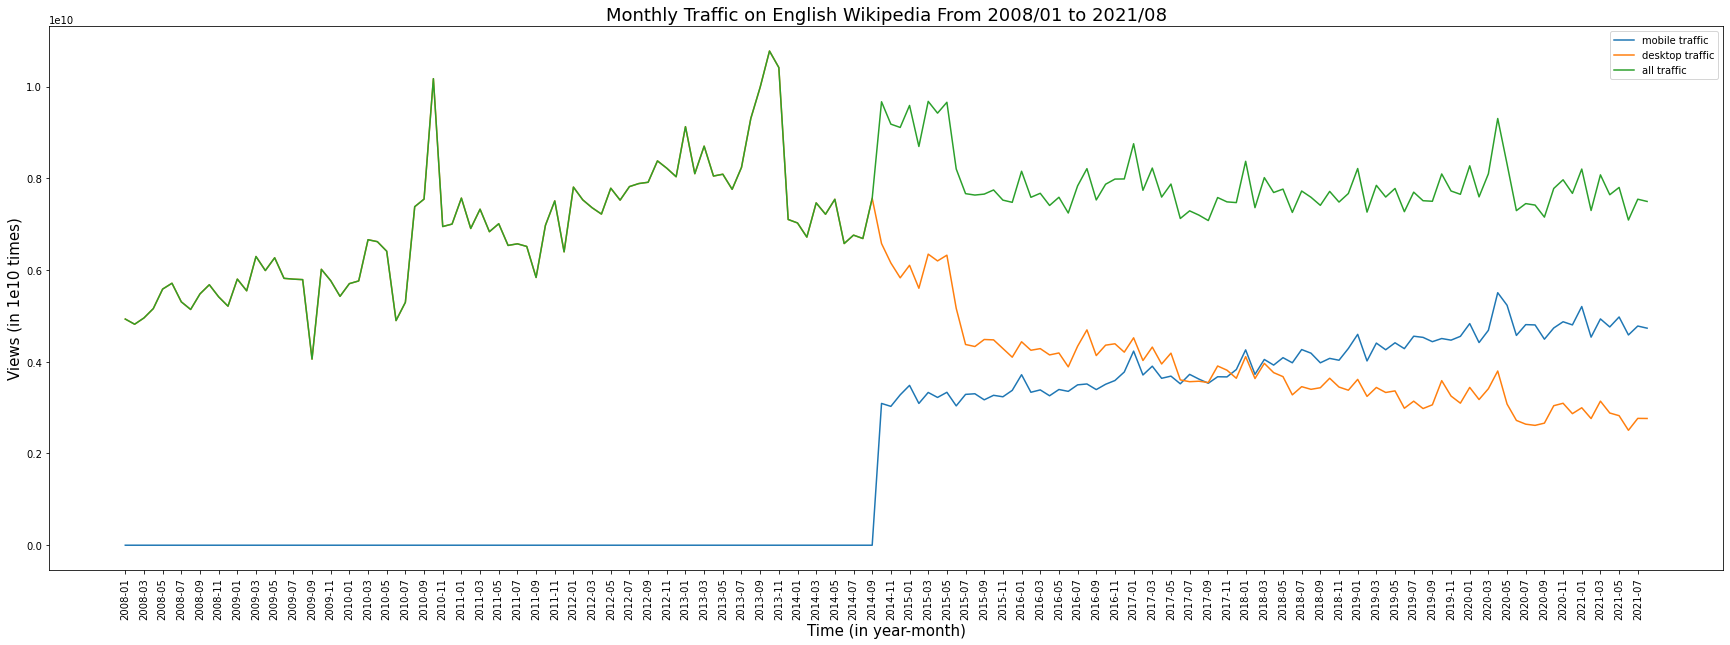

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation='vertical')


g = sns.lineplot(x="time", 
             y="count",
             estimator=sum,
             ci=None,
             hue="type", 
             data=df)

g.set(xticks=df.time[0::6])
g.set_title('Monthly Traffic on English Wikipedia From 2008/01 to 2021/08', size = 18)
g.set_xlabel('Time (in year-month)', size = 15)
g.set_ylabel('Views (in 1e10 times)', size = 15)
g.legend(labels = ["mobile traffic", "desktop traffic", "all traffic"])

# save the plot to png
plt.savefig('traffic data plot')
plt.show()